In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Set font family globally
mpl.rcParams['font.family'] = 'Gowun Batang'
print(mpl.rcParams['font.family'])

['Gowun Batang']


In [3]:
global_font={'family' :'Noto Sans KR' ,'size' : 12 , 'weight' : 'bold'}
mpl.rc('font', **global_font)  #pass in the font dict as kwargs

In [4]:
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Noto Sans KR
Gowun Batang
Noto Sans KR
Gowun Batang
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR


In [5]:
#Unicode minus 표기법 설정

mpl.rc('axes',unicode_minus = False)

In [6]:
%matplotlib inline

## 데이터분석 실습

#### 설문조사 자료 사이트
https://insights.stackoverflow.com/survey

- public 파일 : 설문조사 결과
- schema 파일 : 질문과 답변(public파일의 column)매칭 

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
%pwd

'C:\\python'

In [9]:
#public 파일 불러오기

survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')

In [10]:
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [11]:
#schema 파일 불러오기
#qname에 대해서 question 데이터만 

schema_raw = pd.read_csv('datas/survey_results_schema.csv',index_col='qname')['question']
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

### 데이터 파악

In [12]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [13]:
schema_raw.index  #survey_raw_df의 column과 어느정도 유사 -> 
                  #survey_raw_df의 column에 대한 정보 파악 가능성 존재

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [14]:
#schema_raw index : qname , values: question
#'CompTotal' column의 질문내용 확인

schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [15]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

### 데이터 조회

In [16]:
# column의 개수가 많을 때 한번에 볼 수있는 column의 크기 변화
pd.set_option('display.max_columns',78)

In [17]:
# row에 대해 한번에 볼 수있는 column의 크기 변화
pd.set_option('display.max_rows',78)

In [18]:
#전체 columns(78개) 조회
survey_raw_df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,

In [19]:
selected_columns = [
    #인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    #프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    #고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp'
]

In [20]:
survey_df = survey_raw_df[selected_columns]
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [21]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 71771 non-null  object 
 1   Age                     70946 non-null  object 
 2   Gender                  70853 non-null  object 
 3   EdLevel                 71571 non-null  object 
 4   YearsCode               71331 non-null  object 
 5   YearsCodePro            51833 non-null  object 
 6   LanguageHaveWorkedWith  70975 non-null  object 
 7   LanguageWantToWorkWith  67027 non-null  object 
 8   LearnCodeCoursesCert    29389 non-null  object 
 9   ProfessionalTech        34906 non-null  object 
 10  SOAccount               71572 non-null  object 
 11  Employment              71709 non-null  object 
 12  DevType                 61302 non-null  object 
 13  WorkExp                 36769 non-null  float64
dtypes: float64(1), object(13)
memory usage

### 데이터 분석

#### YearsCode 
- 교육 기간을 포함해서 얼마나 코딩을 했는지에 대한 데이터

In [22]:
#'YearsCode' column의 질문 확인
print(schema_raw['YearsCode'])

Including any education, how many years have you been coding in total?


In [23]:
survey_df['YearsCode'].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [24]:
def count_nan(Series) :
    """
    nan값 개수 구하는 함수
    """
    return len(Series) - Series.count()

In [25]:
count_nan(survey_df['YearsCode'])

1937

In [26]:
#'Less than 1 year'의 값은 0으로 변경
survey_df['YearsCode'].replace('Less than 1 year',0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10396\2364455277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCode'].replace('Less than 1 year',0,inplace=True)


In [27]:
#'More than 50 years'의 값은 51로 변경
survey_df['YearsCode'].replace('More than 50 years',51,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10396\342798296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCode'].replace('More than 50 years',51,inplace=True)


In [28]:
#dtype을 float로 변경
survey_df['YearsCode']=survey_df['YearsCode'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_10396\2883936241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCode']=survey_df['YearsCode'].astype(float)


In [29]:
survey_df['YearsCode']

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

#### YearsCodePro 
- 교육기간 제외, 즉 일한 기간만 나타내는 항목

In [30]:
#'YearsCodePro' column의 질문 확인
print(schema_raw['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [31]:
count_nan(survey_df['YearsCodePro'])

21435

In [32]:
survey_df['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [33]:
survey_df['YearsCodePro'].replace('Less than 1 year',0,inplace=True)
survey_df['YearsCodePro'].replace('More than 50 years',51,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10396\3166318322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCodePro'].replace('Less than 1 year',0,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10396\3166318322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCodePro'].replace('More than 50 years',51,inplace=True)


In [34]:
survey_df['YearsCodePro']=survey_df['YearsCodePro'].astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_10396\1487690052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_df['YearsCodePro']=survey_df['YearsCodePro'].astype(float)


In [35]:
survey_df['YearsCodePro'].dtype

dtype('float64')

In [36]:
#요약 통계
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


##### NaN 값 처리
- to_numeric() : 수치형 데이터 변경
- errors ='coerce' : 숫자로 바꿀 수 없는 값을 Nan으로 처리

In [37]:
survey_df2 = survey_raw_df[selected_columns].copy()
survey_df2['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df2['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

#### Gender 

In [38]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply.'

In [39]:
survey_df2['Gender'].value_counts() 
#;포함 데이터 = 복수응답

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

##### 복수응답 제거

In [40]:
# 특정 문자 값 포함 유무 확인
# contains()
    # na = : NaN값을 대신할 값 지정

In [41]:
#구분자 ';'의 포함 유무 확인
#;를 포함하면 True
#na=False : nan값도 False로 변경
survey_df2['Gender'].str.contains(';', na=False)

ResponseId
1        False
2        False
3        False
4        False
5        False
         ...  
73264    False
73265    False
73266    False
73267    False
73268    False
Name: Gender, Length: 73268, dtype: bool

In [42]:
# ~ : 반전 / True -> False , False -> True
# where(,np.nan) -> ;를 포함하는 데이터는 nan값으로 변경
survey_df2.where(~(survey_df2['Gender'].str.contains(';',na=False)), np.nan, inplace=True)

In [43]:
survey_df2['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

### 데이터 시각화
- set_style(): 그림의 스타일
- rcParams
    - font.size: 기본 폰트의 크기 적용
    - figure.figsize: 기본 figure의 사이즈 적용
    - figure.facecolor: 기본 figure 내 배경 색상을 검정색(#000000)으로 적용
    - axes.facecolor: Axes의 배경 색상 지정

In [44]:
sns.set_style('darkgrid')
mpl.rcParams['font.size']=14
mpl.rcParams['figure.figsize'] = (9,5)
mpl.rcParams['figure.facecolor']='#ffffffff' #숫자가 작을 수록 검정색에 가까워진다

In [45]:
mpl.rcParams['axes.facecolor']='white'

In [46]:
#사용 가능한 스타일 모두 보여줌
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [47]:
plt.style.use('default') #스타일 적용 전 원래 스타일로 적용

In [48]:
plt.style.use('classic')

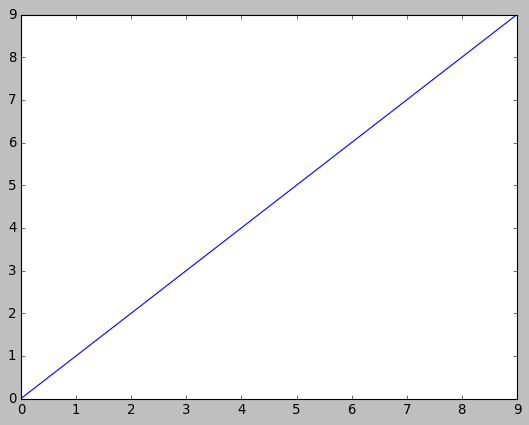

In [49]:
plt.plot(range(10))
plt.show()

#### Country 분석

In [50]:
# Country column 정보 확인
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [51]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [52]:
#고유값 개수
survey_df['Country'].nunique()

180

In [53]:
#설문 응답자가 속한 국가 중 응답자 수 상위 15개 국가
data = survey_df['Country'].value_counts().head(15) #value_counts(sort=True)가 default 
data

United States of America                                13543
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Name: Country, dtype: int64

#### Country 시각화

In [54]:
global_font={'family' : 'Noto Sans KR','size' : 12 , 'weight' : 'bold'}
#폰트설정
mpl.rc('font', **global_font)

In [55]:
mpl.rc('axes',unicode_minus = False)

In [56]:
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['Noto Sans KR']


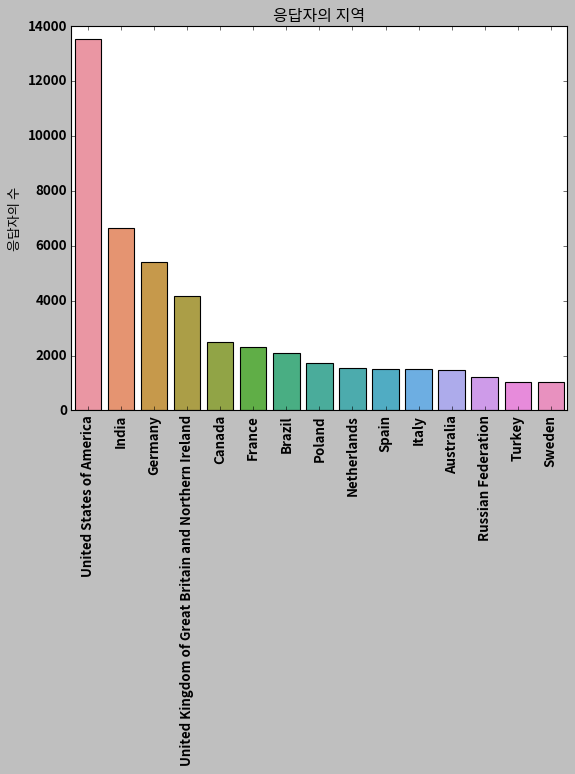

In [57]:
# sns.countplot(data)
x=data.index
plt.title('응답자의 지역')
sns.barplot(x=x,y=data.values)
plt.xticks(rotation=90)         #반시계방향으로 90도 회전
plt.ylabel('응답자의 수')
plt.show()

In [58]:
# 응답자의 비율이 미국과 인도에서 불균형적으로 높다.
# 비영어권 국가의 글로벌 프로그래밍 커뮤니티를 대표하지 않을 수 있음을 알 수 있다.

#### Age 분석
- 응답자의 연령 분포

In [59]:
schema_raw['Age']

'What is your age?'

In [60]:
count_nan(survey_df['Age'])

2322

In [61]:
age_counts = survey_df['Age'].value_counts()

In [62]:
age_counts

25-34 years old       28112
18-24 years old       16646
35-44 years old       13988
45-54 years old        5281
Under 18 years old     3866
55-64 years old        1978
65 years or older       554
Prefer not to say       521
Name: Age, dtype: int64

#### Age 시각화

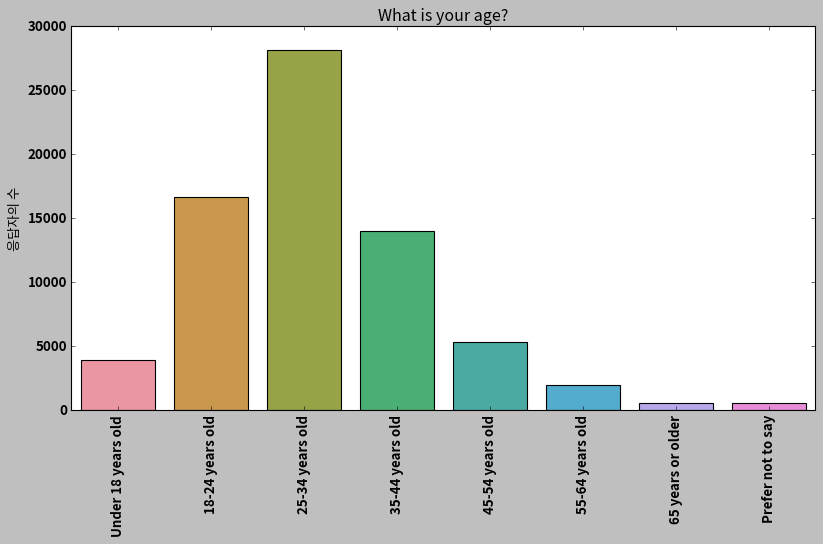

In [63]:
age_order= [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say']
plt.figure(figsize=(12,6))
plt.title(schema_raw['Age'])
plt.xticks(rotation=90)
sns.barplot(x=age_counts.index,y=age_counts.values,order=age_order)
plt.ylabel('응답자의 수')
plt.show()
    

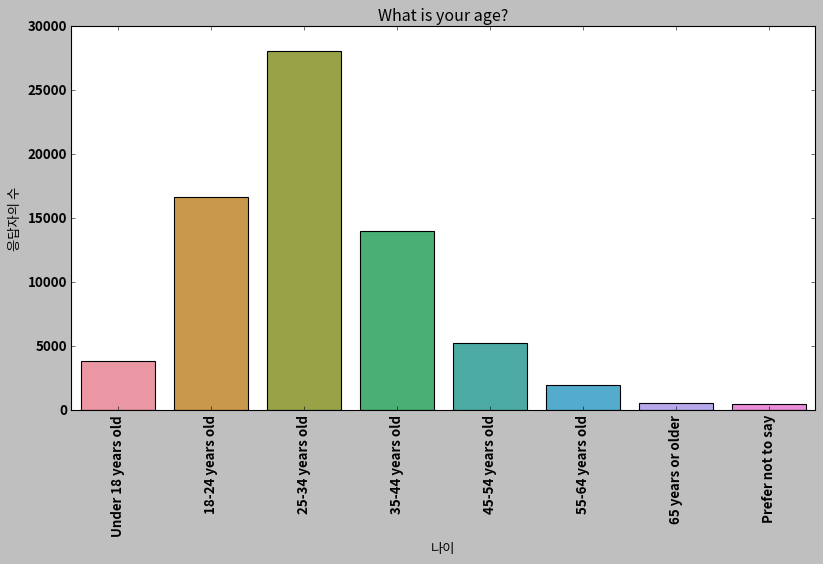

In [64]:
plt.figure(figsize=(12,6))
plt.title(schema_raw['Age'])
plt.xticks(rotation=90)
sns.countplot(data=survey_df,x='Age',order=age_order)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

#### Gender 분석

In [65]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [66]:
#프로그래밍에서 남성의 비율이 높기떄문에
#설문조사 응답 결과에서 왜곡된 분포를 가지는가 파악

gender_counts = survey_df['Gender'].value_counts(True)
gender_counts

Man                                                                                   0.911846
Woman                                                                                 0.047973
Prefer not to say                                                                     0.016541
Non-binary, genderqueer, or gender non-conforming                                     0.009936
Or, in your own words:                                                                0.003938
Man;Non-binary, genderqueer, or gender non-conforming                                 0.003317
Man;Or, in your own words:                                                            0.002413
Woman;Non-binary, genderqueer, or gender non-conforming                               0.002258
Man;Woman;Non-binary, genderqueer, or gender non-conforming                           0.000438
Man;Woman                                                                             0.000339
Man;Or, in your own words:;Woman;Non-binary, gende

#### Gender 시각화

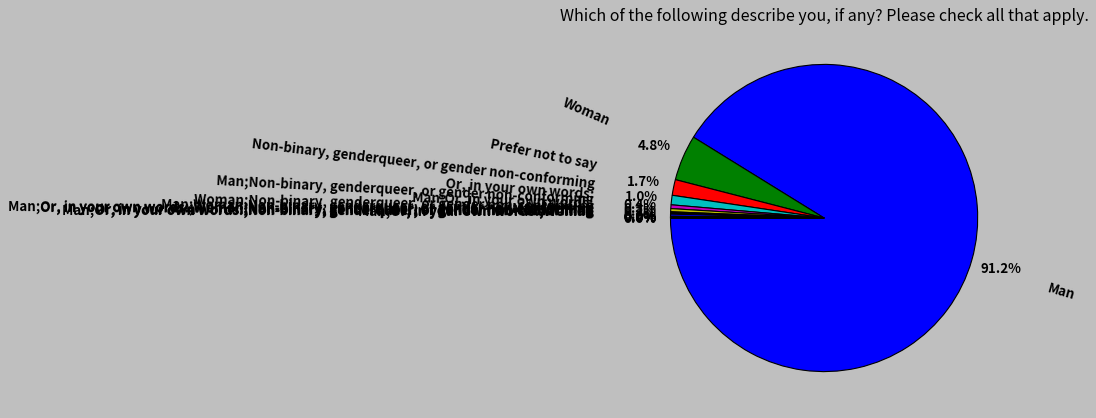

In [67]:
plt.figure(figsize=(12, 6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=180,
        labeldistance=1.5, pctdistance=1.2, rotatelabels=True)
# labeldistance: label의 pie 차트 중심으로부터의 거리
# pctdistance: 값의 pie 차트 중심으로부터의 거리
# rotatelabels: True일 때 label을 회전시켜서 출력
plt.show()

In [68]:
#응답자 중 약 8%만 남성이 아닌 여성 혹은 논바이너
#대다수의 응답이 남성으로부터 나온 것을 확인할 수 있다.

#### EdLevel 분석
- 응답자의 교육 수준

In [69]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [70]:
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30276
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15486
Some college/university study without earning a degree                                 9326
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7904
Associate degree (A.A., A.S., etc.)                                                    2236
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2169
Primary/elementary school                                                              1806
Something else                                                                         1247
Professional degree (JD, MD, etc.)                                                     1121
Name: EdLevel, dtype: int64

#### EdLevel 시각화

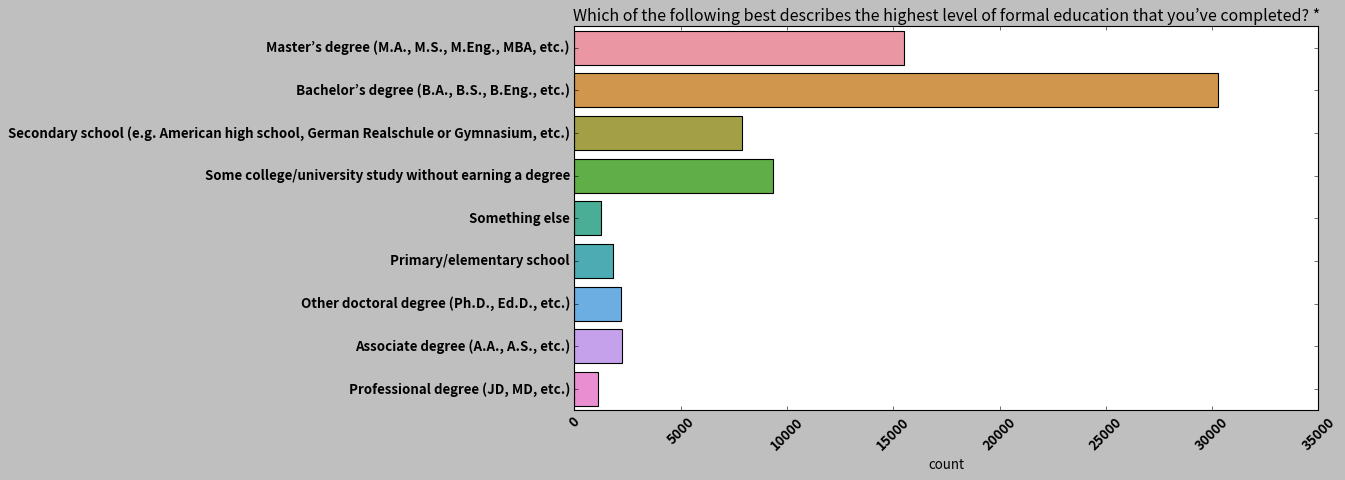

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(y=survey_df['EdLevel'])
plt.xticks(rotation=45);
plt.title(schema_raw['EdLevel'])
plt.ylabel(None)
plt.show()

In [72]:
#응답자의 상당수가 학사 혹은 석사 학위 소지자임을 확인할 수 있다.

Text(0, 0.5, '')

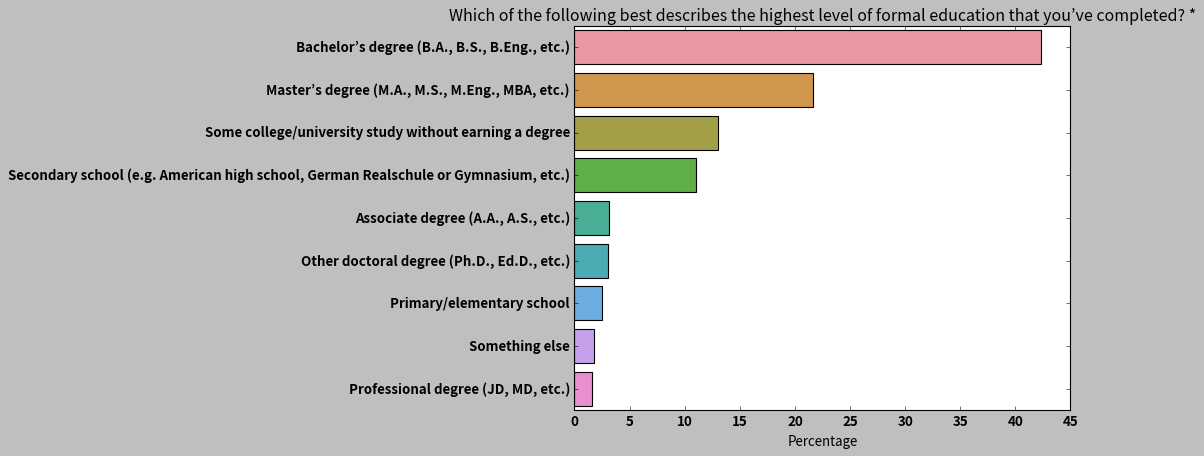

In [73]:
## 응답자의 교육 수준 비율 그래프

#y축 순서 고려
#x축의 단위를 퍼센트로 변경

EdLevel_pct = survey_df.EdLevel.value_counts(normalize = True) * 100   #비율계산 -> normalize =True
EdLevel_pct 

sns.barplot(x=EdLevel_pct ,y=EdLevel_pct.index)
plt.title(schema_raw['EdLevel'])
plt.xlabel('Percentage')
plt.ylabel(None)


In [74]:
#응답자의 40%이상이 학사 학위 소지 
#약 22%가 석사 학위 소지
#설문 응답자 중 약 66%는 어느 정도의 대학 교육을 받았다는 것을 알 수있다.


#### Employment 분석
- 프로그래머 고용 형태

In [75]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [76]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                                                    42962
Student, full-time                                                                                                                      6756
Independent contractor, freelancer, or self-employed                                                                                    4978
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                3486
Not employed, but looking for work                                                                                                      1831
                                                                                                                                       ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                                            1
Employed, ful

#### Employment 시각화
- 고용 형태에 대한 상위 15개 항목에 대한 비율 그래프

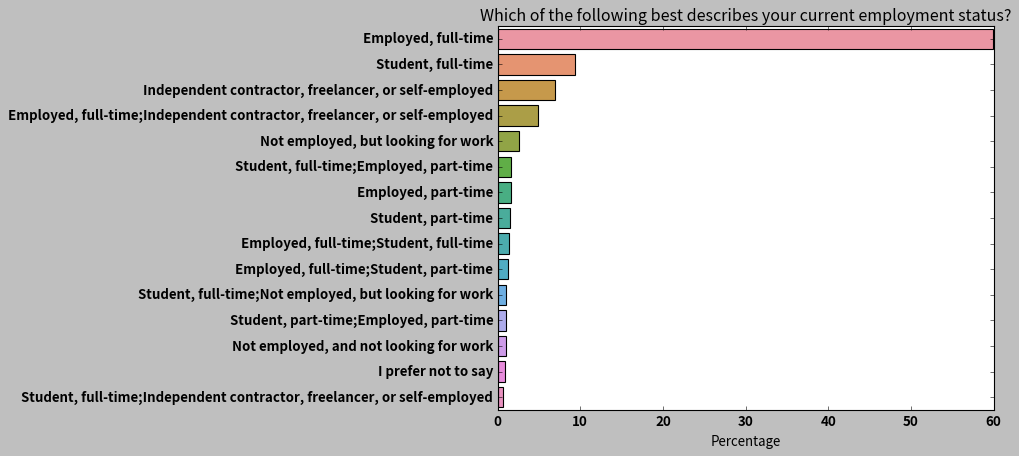

In [77]:
#고용 형태 비율 상위 15개의 데이터
employment = survey_df['Employment'].value_counts(normalize=True, ascending =False).head(15) *100

sns.barplot(x=employment,y=employment.index)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.title(schema_raw['Employment'])
plt.show()

In [78]:
#약 70%가 풀타임으로 가장 많은 고용형태

#### DevType 분석
- 응답자가 맡은 역할
- 복수응답 가능

In [79]:
schema_raw['DevType']

'Which of the following describes your current job? Please select all that apply.'

In [80]:
survey_df['DevType'].value_counts()  #대략 10000개의 데이터

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

##### DataFrame 
- DevType column을 가장 작은 단위의 응답 항목으로 나눔
    - value의 구분자 : ‘;’
    - 인자 : Series  / Series는 items() 메서드를 사용하여 루프할 수 있습니다.
    - 응답자가 제일 작은 단위의 기술 스텍을 선택한 경우 해당 열의 값을 True로 아닌 경우 False로 합니다.


In [81]:
dt = survey_df['DevType']    #Series

In [82]:
result_df= pd.DataFrame(survey_df['DevType']) #데이터 프레임으로변경

In [83]:
def split_multi_col(s):
    result_df= pd.DataFrame(survey_df['DevType'])

In [84]:
#NaN값은 float형이라서 split이 불가능 
#NaN값을 제외한 value값을 구해야 함

for idx, value in dt[dt.notnull()].items():  #NaN값 제외
    print(value.split(';'))                  #;를 구분자로 str 구분
    if idx >10:                              #일부만 확인 
        break

['Data scientist or machine learning specialist', 'Developer, front-end', 'Engineer, data', 'Engineer, site reliability']
['Developer, full-stack']
['Developer, front-end', 'Developer, full-stack', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, QA or test']
['Developer, full-stack', 'Student']
['Developer, back-end']
['Developer, desktop or enterprise applications', 'Developer, mobile', 'Educator']
['Developer, full-stack', 'Developer, back-end']


In [85]:
def split_multicolumn(col_series):
    #반환할 DataFrame
    result_df = pd.DataFrame(col_series)  
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    
    #NaN값을 갖는 row를 제외하고 반복
    for idx, value in col_series[col_series.notnull()].items():
        #value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            #현재 option이 result_df.columns에 없으면 추가
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
                #파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            #result_df.loc[idx,option]=True
    return result_df[options]

In [86]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


def split_multicol(s):
    s.dropna(inplace=True) #결측치 제거
    df = pd.DataFrame(s) #데이터프레임화
    for x in s.str.split(';').items(): #인덱스와 ;를 기준으로 스플릿된 스트링 리스트 반환
        df.loc[x[0],x[1]]=True #해당 인덱스와 스트링 리스트의 요소인 칼럼에 대해 True값 설정
    df.fillna(False,inplace=True) #자동으로 NaN이 된 결측치 모두 False로 변환
    return df
split_multicol(survey_df.DevType)

In [87]:
dev_type_total =dev_type_df.sum().sort_values(ascending=False)

In [88]:
#비율 계산

devtype_percentage = dev_type_total / dev_type_total.sum() *100
devtype_percentage.sum()

100.00000000000001

In [89]:
devtype_percentage

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

#### DevType 시각화
- 각 역할별로 갖는 퍼센트

Text(0.5, 1.0, 'Which of the following describes your current job? Please select all that apply.')

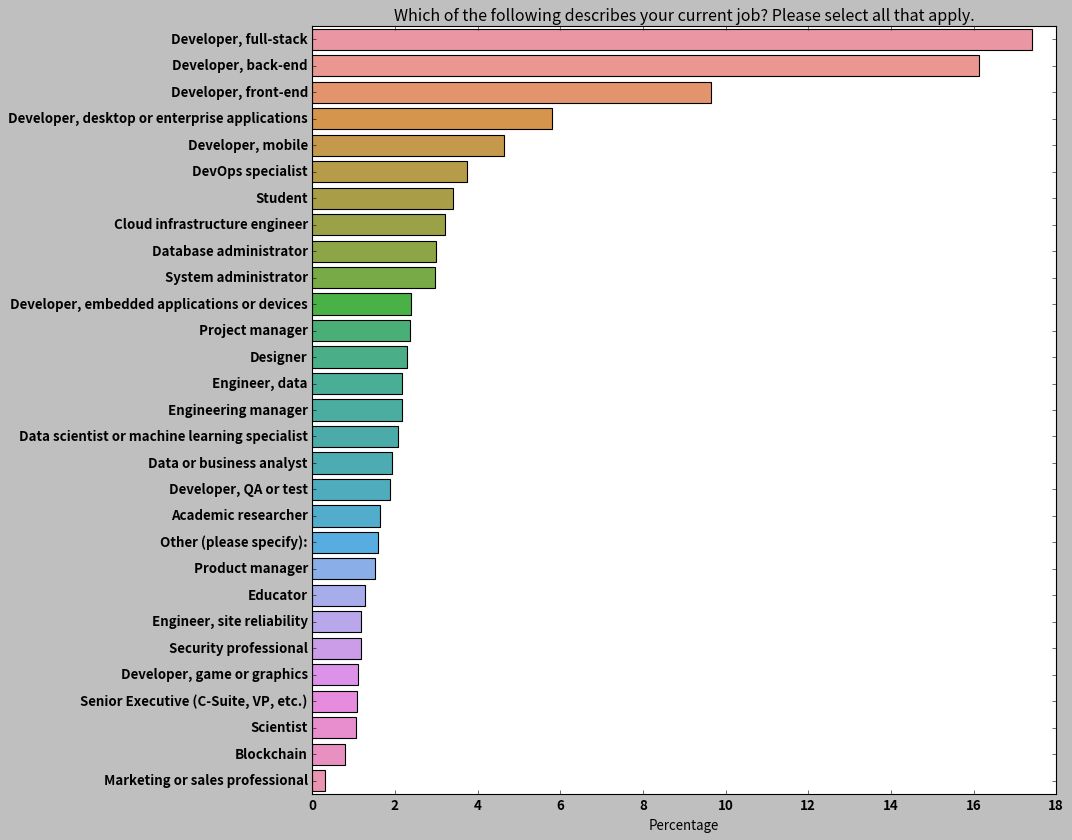

In [90]:
plt.figure(figsize=(12,12))
sns.barplot(x=devtype_percentage,y=devtype_percentage.index)
plt.xlabel('Percentage')
plt.ylabel(None)
plt.title(schema_raw['DevType'])


#### LanguageHaveWorkedWith 시각화
- 프로그래밍 언어

##### 프로그래밍 언어 사용 비율


Text(0, 0.5, '')

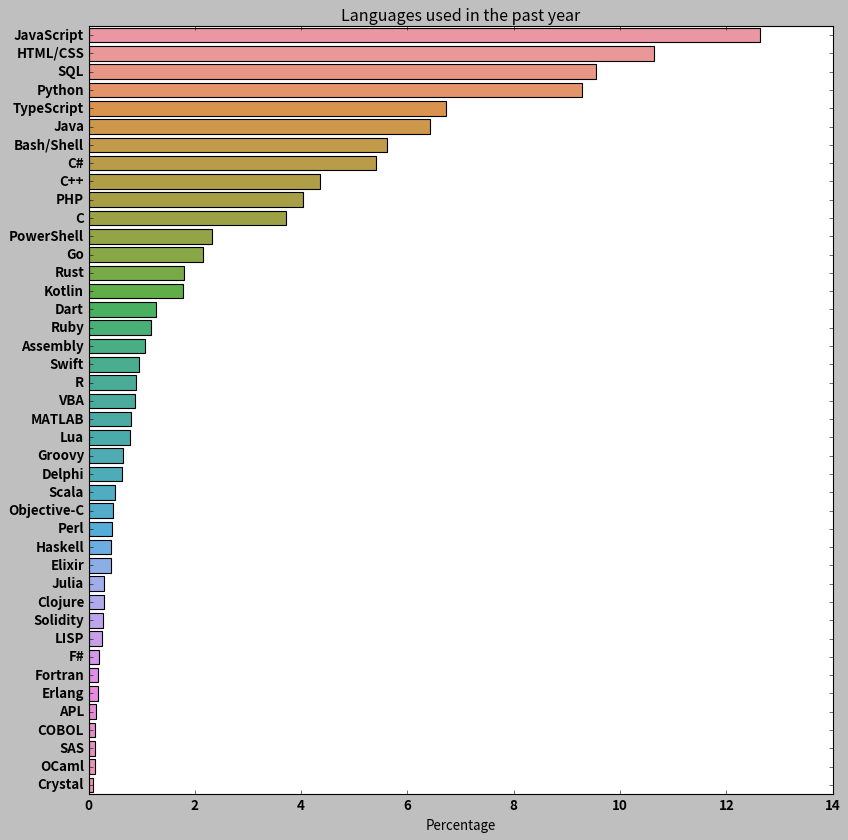

In [91]:
survey_df['LanguageHaveWorkedWith']
language_df_total = split_multicolumn(survey_df['LanguageHaveWorkedWith']).sum().sort_values(ascending=False)
language_rate = language_df_total / language_df_total.sum() * 100

plt.figure(figsize=(12,12))
sns.barplot(x=language_rate,y=language_rate.index)
plt.title('Languages used in the past year')
plt.xlabel('Percentage')
plt.ylabel(None)


In [92]:
#웹 개발이 오늘날 가장 많이 요구되는 기술 중 하나이기 때문에
#Javascript 및 HTML/CSS가 가장 많이 사용하는 기술 스텍으로 조회되었습니다.

#SQL은 관계형 데이터베이스로 작업하는 데 필요하므로 대부분의 프로그래머가 정기적으로 SQL문 작성을 합니다.

#Python은 20년 이상 서버 및 애플리케이션 개발의 업계 표준이었던 Java를 제치고 상위권으로 올랐습니다.

#TypeScript는 5위를 차지했으며 해를 거듭할 수록 인기를 얻고 있습니다

##### 한국 내에서 프로그래밍 언어 사용 비율

Text(0, 0.5, '')

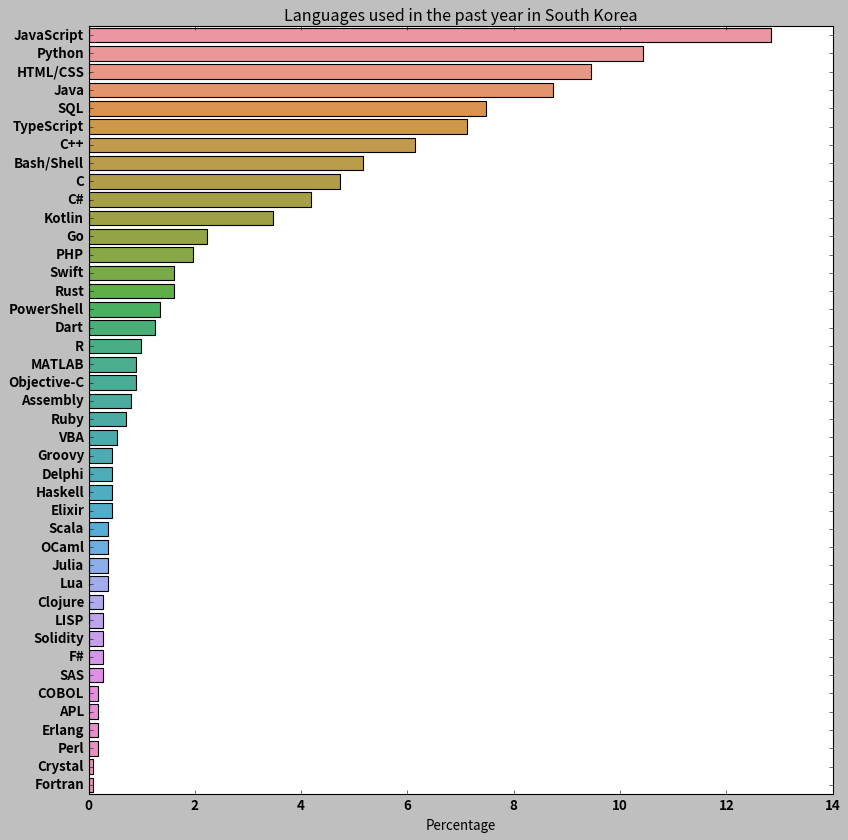

In [93]:
language_kor = survey_df['LanguageHaveWorkedWith'][survey_df.Country == 'South Korea']

language_kor_total = split_multicolumn(language_kor).sum().sort_values(ascending=False)
language_kor_rate = language_kor_total / language_kor_total.sum() * 100
language_kor_rate.sum()

plt.figure(figsize=(12,12))
sns.barplot(x=language_kor_rate,y=language_kor_rate.index)
plt.title('Languages used in the past year in South Korea')
plt.xlabel('Percentage')
plt.ylabel(None)

##### 데이터 사이언스 분야에서 프로그래밍 언어 사용 비율

In [ ]:
lang_df = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
lang_data_total = lang_df[dev_type_df['Data scientist or machine learning specialist']].sum()
lang_data_rate = lang_data_total / lang_data_total.sum() *100
#lang_data_rate = lang_data_df.sum() / *100 
#lang_data_rate.sum()

Text(0, 0.5, '')

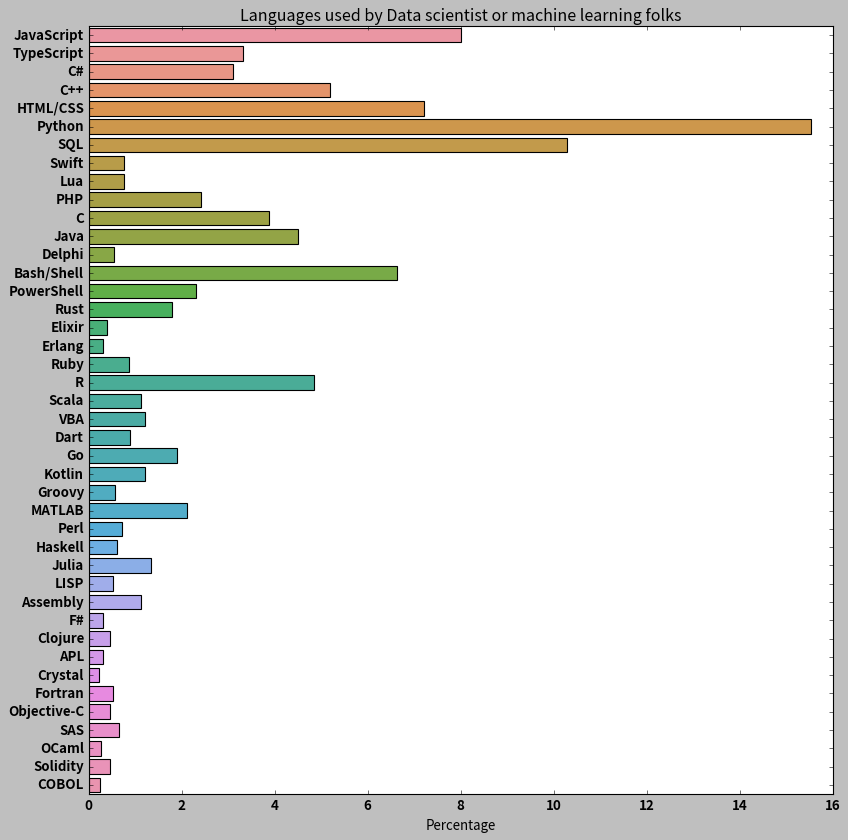

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=lang_data_rate,y=lang_data_rate.index)
plt.title('Languages used by Data scientist or machine learning folks')
plt.xlabel('Percentage')
plt.ylabel(None)